Consider two oscillation systems, one is repressilator and the other is autorepression with time delay. The function is given by
$$\frac{dx}{dt}=\sigma_1\frac{1}{1+p_2^n}+\beta\frac{1}{1+x_2^n}-dx$$
$$\frac{dx_1}{dt}=\beta\frac{1}{1+x^n}-dx_1$$
$$\frac{dx_2}{dt}=\beta\frac{1}{1+x_1^n}-dx_2$$
$$\frac{dp}{dt}=\sigma_2\frac{x^n}{1+x^n}m-\delta p+\eta p_2$$
$$\frac{dp_1}{dt}=\eta p-\delta p_1$$
$$\frac{dp_2}{dt}=\eta p_1-\delta p_2$$
$$\frac{dm}{dt}=\beta_0\frac{1}{1+p_2^n}-\delta m$$


In [4]:
import numpy as np
import scipy.integrate as ode
import random as rd
import os
import time
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.colorbar as mcolorbar
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib import gridspec

import use_function as f

# ODE function
def couple(t,z):
    x,x1,x2,p,p1,p2,m=z
    dxdt=sigma1/(1+p2**n)+beta/(1+(x2**n)) - d*x
    dx1dt=beta/(1+(x**n)) - d*x1
    dx2dt=beta/(1+(x1**n)) - d*x2
    dpdt=sigma2*x**n/(1+x**n)-delta*p+eta*p2
    dp1dt=eta*p-delta*p1
    dp2dt=eta*p1-delta*p2
    dmdt=beta0/(1+p2**n)-delta*m
    return [dxdt,dx1dt,dx2dt,dpdt,dp1dt,dp2dt,dmdt]

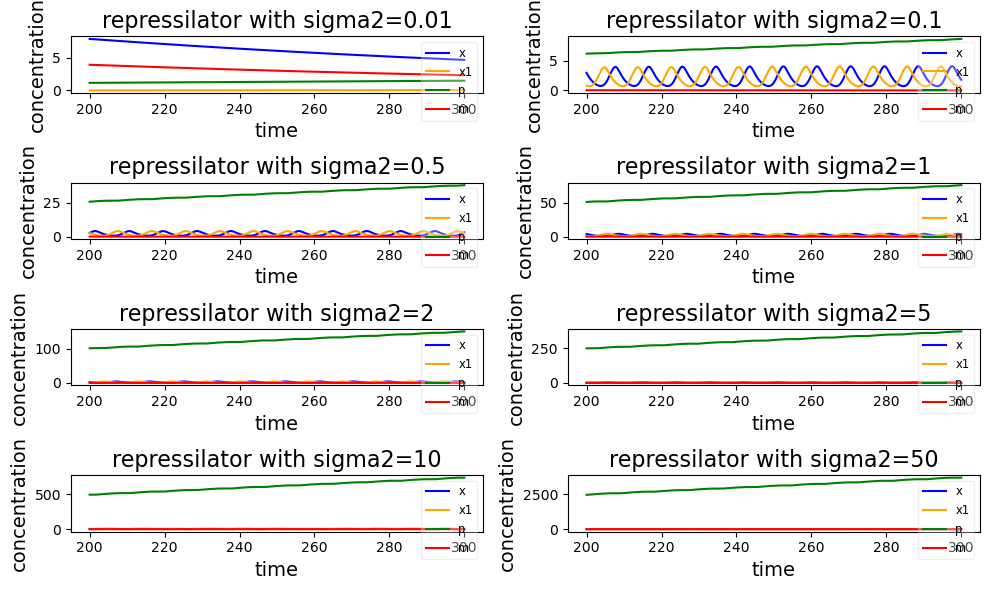

In [6]:
simu_time=300
start_sampling_time=200
timespan=(0,simu_time)
z0=[1.5,0,0,1.5,0,0,1.5]  # initial condition

# parameters
n=3         # hill coef
d=0.5       # repressilator degradation
delta=0.5   # autorepression degradation
sigma1=10  # transcription regulation of x
sigma2=0.5  # translation regulation of p
beta=4      # hill constant
beta0=5     # transcription regulation of m
eta=0.5     # phosphorylation of p

sigma2_span=[0.01,0.1,0.5,1,2,5,10,50]
results:list[any]=[None]*8
plt.figure(figsize=(10, 6))
for i in range(0,8):
    sigma2=sigma2_span[i]
    results[i]=ode.solve_ivp(couple, timespan, z0, t_eval=np.linspace(start_sampling_time,simu_time,(simu_time-start_sampling_time)*100+1), method='RK45', rtol=1e-6, atol=1e-9)
    plt.subplot(4, 2, i+1)
    plt.plot(results[i].t, results[i].y[0], label='x', color='blue', linestyle='-')  # 蓝色实线
    plt.plot(results[i].t, results[i].y[1], label='x1', color='orange', linestyle='-')  # 橙色虚线
    plt.plot(results[i].t, results[i].y[3], label='p', color='green', linestyle='-')  # 绿色点划线
    plt.plot(results[i].t, results[i].y[6], label='m', color='red', linestyle='-')  # 红色点划线
    plt.title('repressilator with sigma2='+str(sigma2_span[i]), fontsize=16)
    plt.xlabel('time', fontsize=14)
    plt.ylabel('concentration', fontsize=14)
    plt.legend(loc='upper right',fontsize='small',framealpha=0.3)

plt.tight_layout()
plt.show()